# Introduction à la librairie Arcade

[Arcade](https://arcade.academy/index.html) est une librairie Python pour la création de jeux. 

C'est une librairie «haut niveau» (plus facile) basée sur la librairie «bas niveau» [pyglet](https://pyglet.readthedocs.io/en/latest/). Elle est conçue pour **faciliter la programmation de jeu** en Python.

Pour l'installer sous windows (je suppose que Python est déjà installé), saisir dans `cmd.exe` (console windows)

    python -m pip install arcade
    
    # AU LYCÉE
    python -m pip install arcade --proxy "http://proxy:8080"

Sa documentation contient une foule d'exemples et quelques tutoriels pour démarrer. Elle contient aussi la documentation de toutes les classes, fonctions (ainsi que leur code source) qu'elle propose.

Ici, je reprends le [tutoriel de la documentation appelé «Simple Plateformer»](https://arcade.academy/examples/platform_tutorial/index.html#) (simple jeu de plateforme).

Pour vous faciliter la vie, je traduis une partie du code mais je vous recommande vivement de comparer avec la version d'origine en anglais pour vous familiariser avec le vocabulaire courant du monde des jeux...

## 1 - Une fenêtre de jeu

Fichier *1_main.py*

La structure de base du code arcade pour produire une fenêtre est:

```python
import arcade

# Constantes
LARGEUR_ECRAN = 1000
#...

class MonJeu(arcade.Window):
    """
    Classe principale de l'application: représente une fenêtre de jeu customisée.
    qui dérive de la fenêtre de base d'arcade `arcade.Window`.
    """

    def __init__(self):
        # Initialise la fenêtre en appelant la méthode __init__ de la classe mère
        # `arcade.Window` (d'où l'utilisation de `super`())
        super().__init__(LARGEUR_ECRAN,...)

        # Choisir la couleur de fond
        arcade.set_background_color(...)

    def setup(self):
        """ Configurer le jeu ici. Appeler cette fonction pour (re)démarrer le jeu."""
        pass

    def on_draw(self):
        """ Affichage à l'écran """

        arcade.start_render()
        # Le code pour dessiner à l'écran:


def main():
    """ fonction principale pour lancer le jeu """
    window = MonJeu()  # création de la fenêtre ...
    window.setup()  # ... puis configuration ...
    arcade.run()  # lance la boucle de gestion des événements (la «mainloop» ...)


if __name__ == "__main__":
    main()
```

On distingue quatre zones:
1. Import d'arcade et déclaration de constantes (par convention en majuscule),


2. Définition de la **classe** `MonJeu`:
    - elle représente une fenêtre Arcade (`arcade.Window`) spécialisée pour notre jeu,
    - c'est à l'intérieur de cette classe qu'on va coder effectivement le jeu,


3. Définition d'une fonction `main` («principale») dont le rôle est simplement de:
    - créer notre fenêtre de Jeu,
    - de la configurer (via son opération `setup`),
    - et de lancer la boucle principale d'arcade (s'occupe de gérer les événements utilisateurs, rafraîchir l'écran etc.)


4. `if __name__ ...`: sert simplement a **appeler** la fonction `main` pour démarrer le jeu.

Si vous souhaitez une introduction rapide au classe sous la forme d'expérimentation, voir le notebook *cours-nsi-premiere/00_bases_python/complements/03_les_classes.ipynb*

#### Note complémentaire sur `if __name__` ...

Lorsqu'on lance **directement** un fichier python *test.py*, la variable *interne* `__name__` vaut `"__main__"`.

En revanche, lorsqu'on **importe** un fichier python - `import test` (inutile de mettre le *.py*) depuis un autre fichier python `autre.py` et qu'on lance ce dernier, alors quand python lit `test.py`, la variable __name__ ne vaut pas "__main__".

Cela permet de distinguer les fichiers lancés *directement* ou *indirectement* (via un import). Voilà une expérience à faire:

Dans *test.py*
```python
print(f"test.py: __name__ vaut {__name__}")
if __name__ == "__main__":
    print("Salut toi!")
```

Dans *autre.py*
```python
import test # doit-être dans le même répertoire que moi!
print(f"autre.py: __name__ vaut {__name__}")
```

Ensuite, on lance python sur chaque fichier (ligne de commande):

    python test.py 
        test.py: __name__ vaut __main__ 
        Salut toi!
    
    python autre.py 
        test.py: __name__ vaut test
        autre.py: __name__ vaut __main__

#### `__init__(self, ...)` ???

Il s'agit d'une fonction spéciale de Python qui est appelée automatiquement lors de la construction de la fenêtre de jeu `window = MonJeu()`.

Elle sert à initialiser les attributs propres à cette fenêtre.

#### `self` ???

Sans entrer dans les détails, `self` représente la fenêtre de jeu *courante* (tandis que la classe `MonJeu` sert à créer cette fenêtre).

On peut utiliser `self` pour ajouter des **attributs** à cette fenêtre (variables attachées à la fenêtre): 
- déclaration/modification `self.mon_attribut = valeur`,
- accès à l'attribut `self.mon_attribut`.

## 2 - Planter le décors

Fichier *2_main.py*

On utilise des images qu'Arcade nous fournit par défaut (voir [là](https://arcade.academy/resources.html)). Elles vont nous servir à:
1. Créer des **Sprites** individuels. Ce sont des images destinées à être animées:
    - `mon_sprite = arcade.Sprite(chemin_img, echelle, ...)` puis
    - on le positionne sur l'écran: `mon_sprite.center_x = x` (et pareil pour y)


2. Grouper ces Sprites dans des listes adaptée `SpriteList`: 
    - `grp_sprites = arcade.SpriteList(options)` puis
    - `grp_sprites.append(<un sprite>)`,


3. Dessiner ces sprites à l'écran: `grp_sprites.draw()` (dans `on_draw`)

Voici des extraits de code pertinent pour le décors (formé de «tuiles» \[*tiles*\]):
```python
    def __init__(self):
        ...
        self.plateformes = None # déclaration de l'attribut «tuiles» pour la fenêtre courante
        ...
    
    def setup(self):
        ...
        self.tuiles = arcade.SpriteList(use_spatial_hash=True)
        ...
        for x in ...:
            bloc_pelouse = arcade.Sprite(
                ":resources:images/tiles/grassMid.png", # chemin
                ECHELLE_TUILE # constante d'échelle
            )
            # positionnement
            bloc_pelouse.center_x = x
            bloc_pelouse.center_y = 32 # fixe ici
            # ajouter chaque bloc à la spriteList des tuiles (attribut de la fenêtre courante)
            self.plateformes.append(bloc_pelouse)
        ...
    
    def on_draw(self):
        ...
        self.plateformes.draw()vers
        ...
            


*Note*: l'argument optionnel `use_spatial_hash=True` de la fonction `SpriteList` est utilisé lorsque les sprites ne seront pas animés (décors); cela permet d'optimiser leur affichage.

## 3 - Déplacement et interaction avec le décors

Fichier *3_main.py* 

### Déplacement du personnage

**Dans** la classe `MonJeu`, On ajoute les fonctions:
- `on_key_press(self, key, ...)`
- `on_key_release(self, key, ...)`.

Ces fonctions seront appelées *automatiquement* dès que l'utilisateur **enfonce** \[*press*\] ou **relâche** \[*release*\] une touche du clavier.

Par exemple, si l'utilisateur enfonce la flèche ↑ du clavier, alors la variable `key` prendra la valeur ... `arcade.key.UP`.

Si cela se produit, on veut déplacer notre personnage vers le haut: `self.personnage.center_y += <valeur>` **sauf si** ça lui fait traverser le décors!!!

### Interaction avec le décors

Comme il n'est pas du tout évident de gérer à la main le «décors» et le «**sauf si**» précédent, on utilise un gestionnaire spécialisé appelé `PhysicsEngineSimple` qui va s'occuper de ces choses pour nous.

Cela se passe en trois temps:

1. créer ce gestionnaire et le placer dans un attribut de la fenêtre courante: 

   `self.physics_engine = arcade.PhysicsEngineSimple(<sprite personnage>, <sprites du decors>)`

2. créer une fonction `on_update(self, delta_time)` dans la classe `MonJeu`: elle sera appelée automatiquement à intervalle régulier

3. appeler, depuis la fonction précédente, la méthode `update` de `physics_engine`.

Voici les portions de code pertinentes:

```python
    def __init__(self):
        ...
        self.physics_engine = None
        ...
    def setup(self):
        ...
        self.physics_engine = arcade.PhysicsEngineSimple(
            self.personnage,  # personnage
            self.plateformes  # obstacles ou sols
        )
        ...
    def on_update(self, delta_time): # nous détaillerons delta_time plus tard
        ...
        self.physics_engine.update()
        ...
```

### Retour au déplacement du personnage

Grâce au «physics_engine», nous pouvons gérer le clavier sans nous préoccuper des obstacles.

Mais plutôt que de modifier le `.center_y` de notre sprite, nous modifions son `.change_y`. Cela donne:

```python
    def on_key_press(self, key, modifiers): # ne pas se préoccuper de modifiers...
        ...
        if key == arcade.key.UP:
            self.personnage.change_y = VITESSE_PERSONNAGE # constante à définir en début de fichier
        if key == arcade.key.DOWN:
            self.personnage.change_y = -VITESSE_PERSONNAGE
        ...
    def on_key_release(self, key, modifiers):
        if key == arcade.key.UP:
            self.personnage.change_y = 0    
        ...
```

## 4 - Ajuster la fenêtre de vue au déplacement du personnage

Fichier *4_main.py*

L'objectif est d'«agrandir» notre petit monde. Précisément, nous souhaiterions que la vue du jeu change lorsque le personnage approche des bords.

*Initialement*, la fenêtre de vue \[*viewport*\] est un rectangle défini par quatre nombres:
- bord gauche: xmin = 0
- bord bas: ymin = 0
- bord droit: xmax = `LARGEUR_ECRAN`
- bord haut: ymax = `HAUTEUR_ECRAN`


Mais arcade propose la méthode `arcade.set_viewport(xmin, ymin, xmax, ymax)` pour recadrer la fenêtre d'affichage.

Ainsi, **pour le côté gauche**, on commence par définir une marge minimum - `MARGE_GAUCHE_VUE` - entre le bord gauche de la vue et le personnage.

Puis, on ajoute l'attribut `self.xmin` à la fenêtre qu'on initialise à `0`.

Ensuite, dans `on_update`, on vérifie si le personnage (son bord gauche) entre dans cette marge (trop proche du bord gauche).

Si c'est le cas, on recalcule `self.xmin` et on règle la fenêtre de vue de façon que la distance du personnage au bord gauche de la fenêtre soit précisément `MARGE_GAUCHE_VUE`. Cela donne quelquechose comme:

```python
    def on_update(self, time_delta):
        ...
        if self.personnage.left < self.xmin + MARGE_GAUCHE_VUE:
            # le personnage est trop proche du bord gauche!! On recadre
            self.xmin = self.personnage.left - MARGE_GAUCHE_VUE
            # et on règle la vue
            arcade.set_viewport(
                self.xmin,
                self.ymin,
                self.xmin + LARGEUR_ECRAN # xmax
                self.ymin + HAUTEUR_ECRAN # ymax
            )
```

Reste à faire de même pour les trois autres bords...

## 5 - Un personnage qui «saute»

Fichier *5_main.py*

Pour réaliser cela facilement, on va changer le moteur `PhysicsEngineSimple` par le moteur `PhysicsEnginePlatformer` lequel prend en compte un paramètre pour simuler de la gravité. Reste alors à préciser le comportement lors de l'appui sur la touche ↑.

On commence par définir de nouvelles constantes: `GRAVITE` et `VITESSE_SAUT_PERSONNAGE` puis:

```python
    ...
    def setup(self):
        ...
        self.physics_engine = arcade.PhysicsEnginePlatformer(
            self.personnage,  # personnage
            self.plateformes,  # obstacles ou sols
            GRAVITE  # force de la gravité
        )
    ...
    def on_key_press(self,...):
        ...
        if key == arcade.key.UP:
            # On vérifie que le joueur peut sauter
            if self.physics_engine.can_jump():
                self.personnage.change_y = VITESSE_SAUT_PERSONNAGE
        ...
```

## 6 - Du son et des pièces d'argent

Fichier *6_main.py*

Pour le son, on charge un fichier son avec `mon_son = arcade.load_sound(chemin_fichier_son)`, puis on déclenche avec `arcade.play_sound(mon_son)` au moment propice (par exemple lors d'un saut).

Pour les pièces, on procède de manière similaire aux tuiles (herbe et obstacles) pour les placer, les dessiner... Remarquez qu'on les groupe dans une `SpriteList` dédiée (ici nommée `self.pieces`).

Reste à gérer dans `on_update` la collision entre le personnage et les pièces avec `arcade.check_for_collision_with_list(un_sprite, des_sprites)` qui renvoie une liste de sprite en collision avec `un_sprite`. 

Dans les grandes lignes, cela donne:

```python
    def __init__(...):
        ...
        self.son_collecte_piece = arcade.load_sound('sounds/coin1.wav')
        ...
    ...
    def on_update(...):
        ...
        # on récupère ... (noter que `pieces` n'a rien a voir avec `self.pieces`)
        pieces = arcade.check_for_collision_with_list(self.personnage, self.pieces)
        # ... et on agit
        for piece in pieces:
            piece.remove_from_sprite_lists()
            arcade.play_sound(self.son_collecte_piece)
```

## 7 - Afficher un score

Fichier *7_main.py*

On utilise pour cela `arcade.draw_text(texte, x, y, couleur, taille)`.

On commence par ajouter l'attribut `score` à notre fenêtre: `self.score = 0`.

On le met à jour dans la partie de `on_update` qui gère les collisions (visible au dessus): `self.score += 1`.

Et on affiche, dans `on_draw`, avec la fonction mentionnée au début (attention que le x et le y se rapporte à la fenêtre de vue...).

Dans les grandes lignes:

```python
    ...
    def __init__(...):
        ...
        self.score = 0 # à répéter dans le setup
        ...
    ...
    def on_draw(...):
        ...
        arcade.draw_text(
            f"Score: {self.score}", # le texte
            self.xmin + 10, self.ymin + 10, # x, y: en bas à gauche de la vue
            arcade.csscolor.WHITE, # couleur
            18 # taille en pts
        )
        ...
    ...
        
```

## 8 - Utiliser une carte de jeu (une *tilemap*)

Fichier *8_main.py*

Plutôt que de placer chaque Sprite «à la main» comme nous l'avons fait jusqu'ici, on peut utiliser une «*tilemap*».

Voilà à quoi cela ressemble dans le logiciel libre [Tiled Map Editor](https://www.mapeditor.org/).

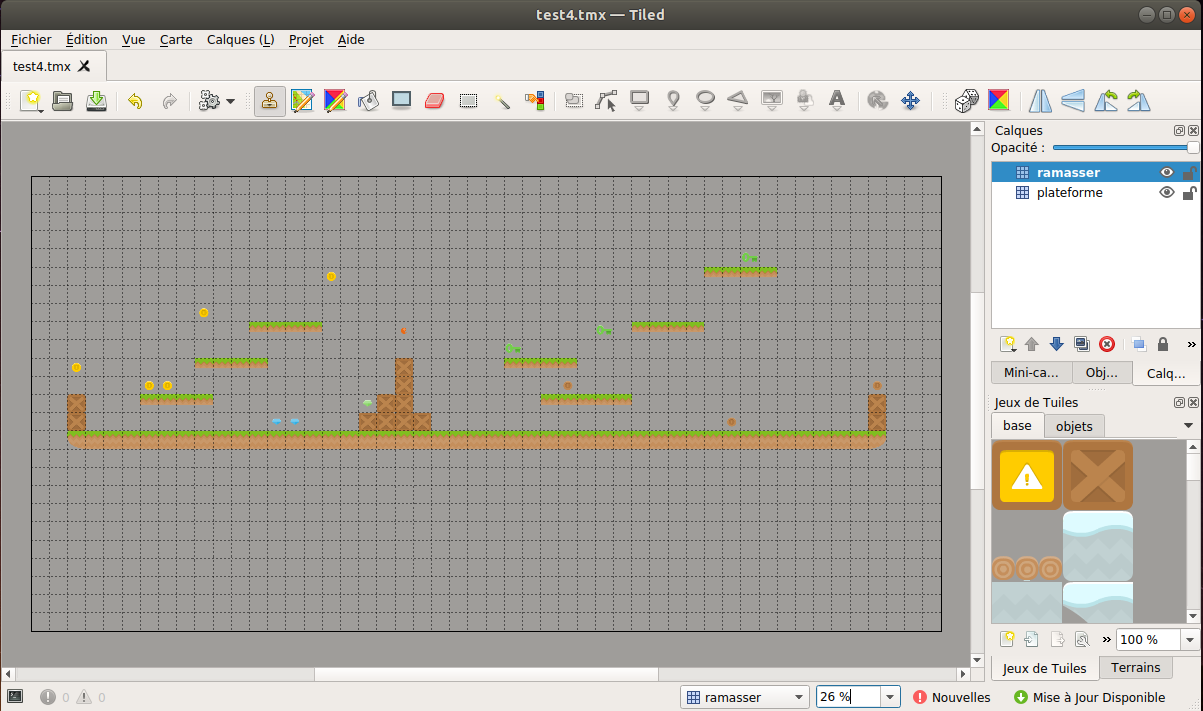

On distingue **3 zones**: la **carte** elle-même, le **jeu de tuiles** (*tiles*) qui a servi à la «peindre» et les **calques** (*layers*) qui permettent de distinguer certains groupes de tuiles.

Ici, le calque «**ramasser**» contient les petits objets (pièces, diamands, clés...), l'autre «**plateforme**» contient les éléments de ... plateforme! 

Le logiciel produit un fichier d'extension *.tmx* qu'on peut alors charger avec arcade. Pour cela, on utilise:
- `carte = arcade.read_tmx(chemin_fichier_tmx)` - [doc](https://arcade.academy/arcade.html#arcade.read_tmx)/[src](https://arcade.academy/_modules/arcade/tilemap.html#read_tmx)

Puis, on charge *chaque calque* dans une `SpriteList` dédiée:
- `self.tuiles = arcade.process_layer(carte, nom_calque, ...)` - [doc](https://arcade.academy/arcade.html#arcade.process_layer)/[src](https://arcade.academy/_modules/arcade/tilemap.html#process_layer)

Pour voir rapidement ce que cela donne, on peut utiliser une carte des [ressources](https://arcade.academy/resources.html#resources-tmx-maps) fournies par arcade. Le chemin d'accès commence par `":resources:tmx_maps/<nom_fichier>"` où le nom du fichier est (nom fichier suivi de ses calques): `map.tmx`, `map2_level1.tmx`, ... etc.

Cartes possibles et leurs calques (pas dans la doc!):

- `level_1.tmx`: *Platforms*
- `level_2.tmx`: *Platforms*
- `map_with_custom_hitboxes.tmx`: *Coins*, *Obstructions*
- `map_with_external_tileset.tmx`: *Obstructions*
- `map_with_ladders.tmx`: *Background*, *Coins*, *Ladders*, *Platforms*, *Moving Platforms*
- `map.tmx`: *Platforms*, *Coins*
- `map2_level_1.tmx`: *Background*, *Foreground*, *Don't Touch*, *Coins*, *Platforms*
- `map2_level_2.tmx`: idem
- `test_map_1.tmx`: *Background*, *Platforms*
- `test_map_2.tmx`: *Platforms*, *Coins*, *Dirt*
- `test_map_3.tmx`: *Platforms*, *Moving Platforms*, *Text Layer*
- `test_map_4.tmx`: *Background*, *Platforms*
- `test_map_5.tmx`: *Object_layer*, *Tile_layer_1*
- `test_map_6.tmx`: *Tile_layer_1*
- `test_map_7.tmx`: semble corrompu...
- `test_objects.tmx`: *Tiles*, *Group*, *Text*, *Shapes*.

Ainsi, par exemple, et après avoir supprimé le code qui place les sprites «manuellement» (sauf pour le personnage!):

```python
    def setup(...):
        ...
        carte = arcade.read_tmx(":resources:tmx_maps/map.tmx")
        
        self.pieces = arcade.process_layer(
            carte,
            "Coins",
            # options               # par défaut   
            scaling=ECHELLE_TUILES, # 1
            use_spatial_hash=True   # False
        )
        
        self.plateformes = arcade.process_layer(
            carte,
            "Platforms,
            scaling=ECHELLE_TUILES,
            use_spatial_hash=True
        )
        ...
```

*Note1*: on peu même supprimer les déclarations `self.plateformes = arcade.SpriteList(...)` car `.process_layer(...)` renvoie ... une `SpriteList`.

*Note2*: on expliquera un peu plus tard comment faire ses propres cartes de jeu.

## 9 - Changer de carte pendant le jeu

Fichier *9_main.py*

Pour illustrer cela nous utiliserons les cartes d'Arcade `map2_level1` et `map2_level2`.

L'idée est d'ajouter un paramètre `niveau` à la fonction `.setup(self, niveau)` et d'appeler cette fonction lorsque l'utilisateur arrive
à la «fin» d'une carte dans `.on_update(...)`.

Ainsi:
1. On ajoute l'attribut `niveau` à la fenêtre et le paramètre `niveau` à son `.setup()`,
2. Dans `.setup`, on charge la carte en fonction du niveau,
3. On ajoute l'attribut `x_max_carte` à la fenêtre et on le calcule dans `.setup`:
4. Dans `.on_update`, on compare `self.personnage.center_x` avec `self.x_max_carte` et on agit en conséquence.

Dans les grandes lignes, cela donne:

```python
    ...
    def setup(self, niveau):
        self.niveau = niveau
        ...
        carte = arcade.read_tmx(f":resources:tmx_maps/map2_level{niveau}.tmx")
        # carte.map_size.width est le nombre de tuiles en largeur,
        # carte.tile_size.width est la largeur en px des tuiles (avant mise à l'échelle)
        self.x_max_carte = carte.map_size.width * (carte.tile_size.width * ECHELLE_TUILE)
        ...
    ...
    def on_update(...):
        ...
        if self.personnage.right > self.x_max_carte:
            niveau = 2 if self.niveau == 1 else 1
            # c'est ici qu'on comprend l'intérêt de distinguer 
            # `setup` et `__init__`
            self.setup(niveau)
            arcade.play_sound(self.son_niveau)
```

*Note1*: On peut aussi ajouter un son pour marquer qu'on change de niveau.

*Note2*: le score est remis à zéro lorsqu'on change de niveau, pouvez-vous corriger ce bug?

## 10 - Mourir...

Fichier *10_main.py*

Peut- être avez-vous remarqué que les cartes `map2_level...` contenaient en plus des calques *Coins* et *Platforms*, les calques:

**Background**, **Foreground** et **Don't Touch**.

Les deux premiers contiennent des éléments de décors et le dernier - *Don't Touch* - des éléments comme de la lave ou des piques.

Nous allons donc charger ces calques (dans `self.arriere_plan`, `self.avant_plan` et `self.pas_touche`) sans oublier de les dessiner dans le bon ordre dans `on_draw` (car ils s'affichent les uns par dessus les autres...).

Enfin, dans `on_update`, on teste si le personnage entre en collision avec un sprite de `self.pas_touche` auquel cas on ramène le joueur à sa position initiale dans la première carte (tout en jouant un petit son: *lose1.wav*).

## 11 - Plateformes mouvantes et échelles

Fichier *11_main.py*

Dans cette partie nous utiliserons la carte d'arcade `map_with_ladders.tmx`. Ses calques sont *Background, Coins, Ladders, Platforms, Moving Platforms*. 

Les calques suivants contiennent des **éléments animés**:
- *Background*,
- *Coins*.

Si une SpriteList contient des éléments animés, on peut «jouer» l'animation avec `.update_animation()` (dans `on_update`).

Le «gestionnaire physique» `PhysicsEnginePlatformer` dispose d'un paramètre optionnel `ladders` qui permet de préciser une SpriteListe regroupant les sprites correspondant à une ou des échelles (pour grimper...).

Il dispose aussi d'une méthode `.is_on_ladder()` qui permet de savoir si le personnage «touche» une échelle et d'agir en conséquence.

Enfin, le calque *Moving Platforms* est un «calque à objets». Un objet peut être placé n'importe où sur la carte (pas seulement dans la grille). On peut, dans l'éditeur de carte, attribuer à un tel objet des «propriétés personnalisées» pour l'animer automatiquement. Ici:
- `boundary_bottom`: limite basse (en px) du mouvement,
- `boundary_top`: limite haute (en px) du mouvement
- `change_y`: déplacement en y

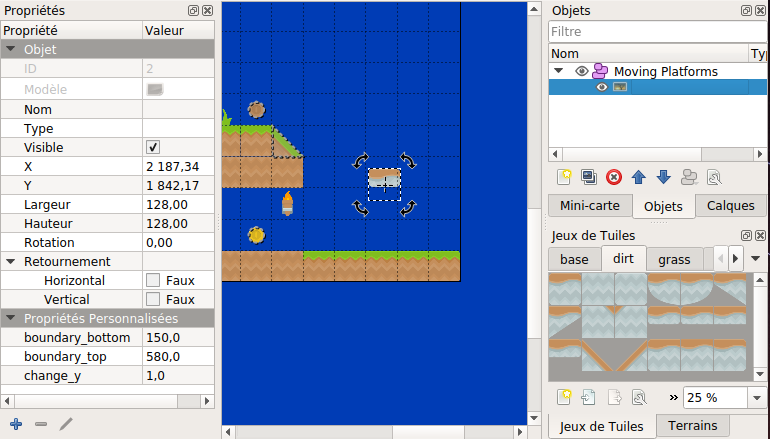

Lorsque le calque est lu via `.process_layer()`, les sprites correspondant à ces objets récupèrent ces propriétés comme attribut et sont ainsi automatiquement animés - [doc](https://arcade.academy/arcade.html#arcade.Sprite). Il semble que le lorsque le sprite atteint l'une de ses limites, le signe de `change_y` est automatiquement modifié (mal documenté).

Si tout cela n'est pas tout à fait clair, rassurez-vous nous l'aborderons à nouveau lorsqu'on précisera comment utiliser l'éditeur de carte.

Dans les grandes lignes:

```python
    ...
    def setup(...):
        ...
        self.echelles = arcade.process_layer(...)
        plateformes_mobiles = = arcade.process_layer(...)
        # Ce sont des plateformes donc ...
        for plateforme in plateformes_mobiles:
            self.plateformes.append(plateforme)
        ...
        self.physics_engine = arcade.PhysicsEnginePlatformer(
                ...
                ladders=self.echelles
            )
    ...
    def on_key_press(...):
        ...
        if key == arcade.key.UP:
            ...
            if self.physics_engine.is_on_ladder():
                self.personnage.change_y = VITESSE_PERSONNAGE
        if key == arcade.key.DOWN and self.physics_engine.is_on_ladder():
            self.personnage.change_y = -VITESSE_PERSONNAGE
        ...
    ...
    def on_update(...):
        ...
        self.pieces.update_animation() # pour les drapeaux
        self.arriere_plan.update_animation() # pour les torches
        ...
```

## 12 - Suite à venir...